# Frequency Analysis

Run all cells in sequence.

In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
# fs = [60, -60, 440, -440, 330, -330, 189, -189] #, 2060, -2060, 788, -788, 921, -921, 1033, -1033, 89, -89]
k = 30
SR = 48000
bandlimit = 16
fs = np.random.rand(k) * SR / bandlimit # generate random frequencies up to SR / bandlimit
# N = k ** 2 #
N = bandlimit * k
phasor = 2 * np.pi * np.arange(0, N / SR, 1 / SR)
phases = np.array([phasor * f for f in fs])
vectors = np.exp(1j * phases)

A = vectors.copy().T

In [5]:
# orthonormalize the basis for W
delta = 0.1 / N
for i in tqdm(range(50000)):
    A += delta * A @ (np.eye(k) - np.conj(A.T) @ A)

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [00:22<00:00, 2226.16it/s]


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Vectors:


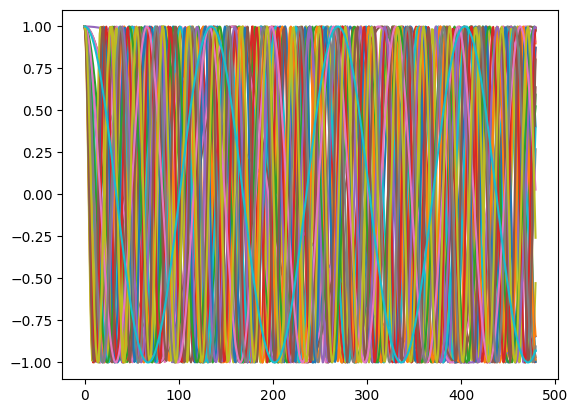

Correlation:


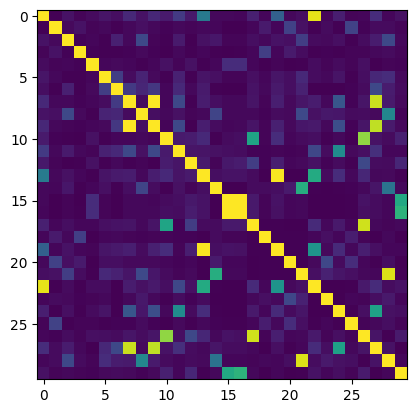

Orthonormalized:


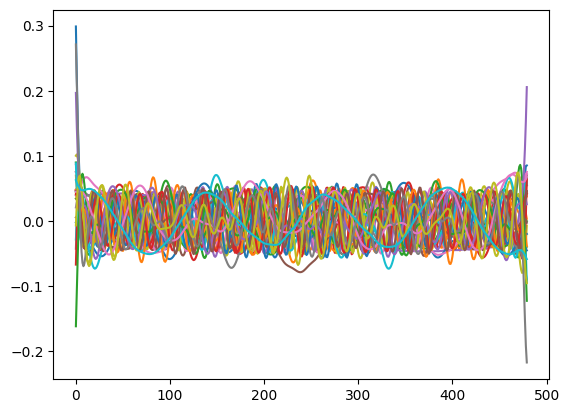

Correlation:


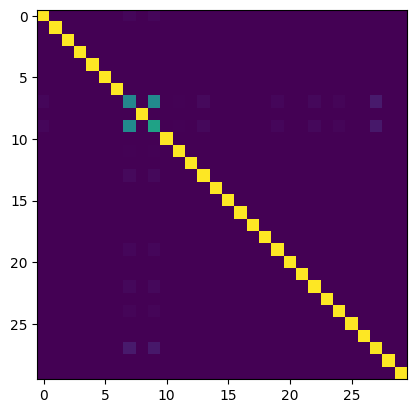

Mixed:


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


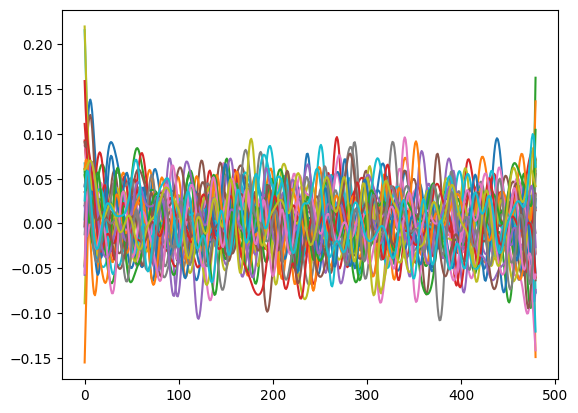

Correlation:


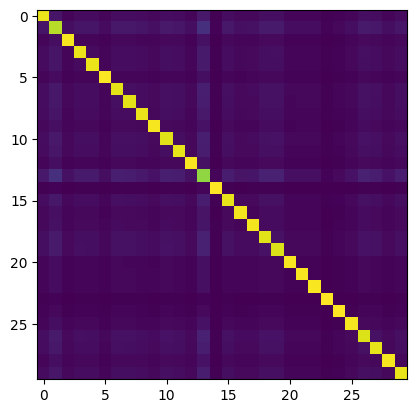

In [6]:
print("Vectors:")
plt.plot(vectors.T[:1000])
plt.show()

print("Correlation:")
plt.imshow(np.abs(np.conj(vectors) @ vectors.T))
plt.show()

print("Orthonormalized:")
plt.plot(A[:1000])
plt.show()

print("Correlation:")
plt.imshow(np.abs(np.conj(A.T) @ A))
plt.show()

# generate random orthogonal matrix to right-mult by
Y = np.random.random((k,k)) + 1j * np.random.random((k, k))
Y = Y - np.conj(Y.T)
X = scipy.linalg.expm(Y)

# this is now the "mixed up" matrix that we would be handed, whose image
# spans that of vectors. the goal is to recover vectors
Z = A @ X

print("Mixed:")
plt.plot(Z[:1000])
plt.show()

print("Correlation:")
plt.imshow(np.abs(np.conj(Z.T) @ Z))
plt.show()

In [7]:
S = np.linalg.inv(np.conj(Z[:-1,:].T) @ Z[:-1,:]) @ np.conj(Z[:-1,:].T) @ Z[1:,:]

omegas = np.linalg.eigvals(S)

freqs = np.sort([np.angle(o) * SR / (2 * np.pi) for o in omegas])
fs = np.sort(fs)

print("Detected:", freqs, "\n")

print("True:", fs, "\n")

print("Errors", freqs - fs, "\n")

Detected: [  59.11355289  304.27629115  307.43970818  356.76838828  585.00832792
  693.36430169  726.0499247   747.53047346  946.06544553  953.33873405
 1005.23311471 1020.47996489 1143.30568926 1204.64734327 1259.64112663
 1282.00997001 1284.15427469 1405.01256498 1489.12072375 1588.43701515
 1669.63130694 1732.75776613 1750.72352637 1801.91643253 2102.55329507
 2253.34990756 2412.21869163 2495.03910281 2697.50476843 2858.07378455] 

True: [  59.11355289  304.27629115  307.43970819  356.76838828  585.00832792
  693.36430169  726.0499247   747.53047346  946.06544464  953.33873542
 1005.2331131  1020.47996595 1143.30568959 1204.64734268 1259.6411267
 1282.00998046 1284.15426293 1405.01256499 1489.12072376 1588.43701514
 1669.63130694 1732.75776613 1750.72352637 1801.91643253 2102.55329507
 2253.34990756 2412.21869163 2495.03910281 2697.50476843 2858.07378455] 

Errors [ 4.89563945e-12  4.89364993e-10 -4.23483471e-10 -7.12248038e-11
  1.01522346e-10  4.85624696e-09 -8.63133209e-09  3.552